In [2]:
%load_ext Cython
%load_ext autoreload
%autoreload 2
from vtk import *
import numpy as np
from numpy.linalg import inv, det


class Point():
    def __init__(self, x, y, z, index):
        self.x = x
        self.y = y
        self.z = z
        self.index = index

class Cell():
    def __init__(self, number_of_connections, points, cell_type):
        self.number_of_connections = number_of_connections
        self.points = points
        self.cell_type = cell_type
        

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from IO import import_vtk_file
from grid import Grid
# The source file
file_name = "Square_Triangle.txt"
 
data = import_vtk_file(file_name)

grid = Grid(data)
grid.set_grid()
print(grid.geometry(111).stiffness_local)
print(grid.geometry(0).local2global(2))
print(grid.points[2, 1])


[[ 0.68788187 -0.36634215 -0.32153972]
 [-0.36634215  0.55853569 -0.19219353]
 [-0.32153972 -0.19219353  0.51373325]]
459
0.0


[[ 0.84097415  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.84875507  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.84097415 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  3.48340075 -0.54836425
  -0.67468034]
 [ 0.          0.          0.         ..., -0.54836425  3.47495108
  -0.56532996]
 [ 0.          0.          0.         ..., -0.67468034 -0.56532996
   3.47805309]]


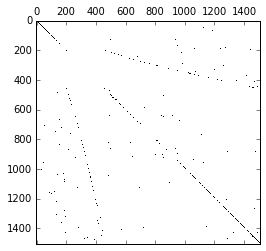

In [4]:
grid.points
grid.cells
A, f = grid.construct_matrix_a()
print(A)
plt.spy(A)
plt.show()

In [ ]:
from scipy.sparse.linalg import spsolve
print(A)

row = []
col = []
data = []

for i in range(len(A)):
    for j in range(len(A)):
        if(A[i, j] != 0):
            row.append(i)
            col.append(j)
            data.append(A[i, j])

In [11]:
from scipy.sparse import coo_matrix

B = coo_matrix((data, (row, col)), shape=(A.shape[0], A.shape[0]))

sol = np.matrix(spsolve(B.tocsr(), f)).T

xlist = []
ylist = []

for point in grid.points:
    x = point[0, 0]
    y = point[0, 1]
    xlist.append(x)
    ylist.append(y)
print(sol[300:400])

ValueError: matrix - rhs dimension mismatch ((3012, 3012) - 1505)

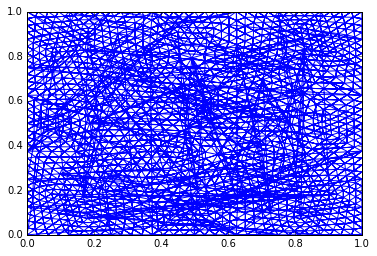

In [12]:
x_list = []
y_list = []

for cell in grid.cells:
    for i in range(3):
        x = grid.points[cell.item(i)][0, 0]
        y = grid.points[cell.item(i)][0, 1]
        x_list.append(x)
        y_list.append(y)

plt.plot(x_list, y_list)
plt.show()
        


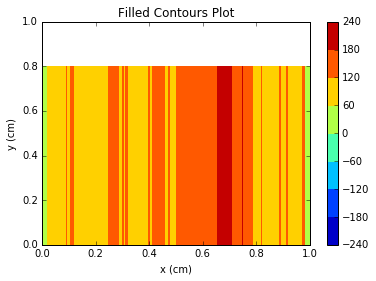

In [17]:

import numpy as np
import matplotlib.pyplot as plt
X, Y = np.meshgrid(xlist, ylist)

Z = [np.array(spsolve(B.tocsr(), f))]*1505
plt.figure()
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()



1505

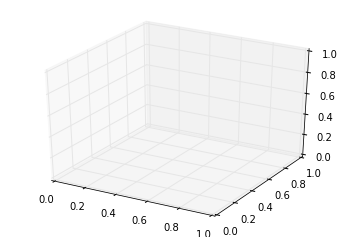

In [91]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
  return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(xlist, ylist)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])

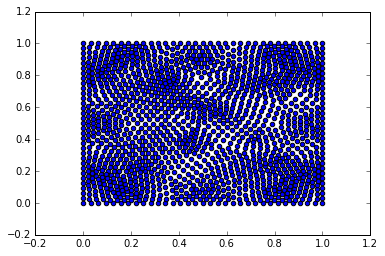

In [70]:
plt.scatter(xlist,ylist)

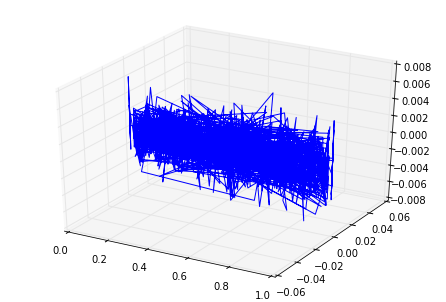

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)

x = xlist
y = ylist
z = sol.T

# put 0s on the y-axis, and put the y axis on the z-axis
ax.plot(xs=x, ys=[0]*len(x), zs=z, zdir='z', label='ys=0, zdir=z')
plt.show()

In [20]:
for i in range(len(xlist)):
    print(xlist[i], ylist[i], sol[i])

(0.0, 0.0, matrix([[-0.00779545]]))
(0.0, 1.0, matrix([[-0.01989365]]))
(1.0, 0.0, matrix([[-0.00898992]]))
(1.0, 1.0, matrix([[-0.02352265]]))
(0.0, 0.96875000000001599, matrix([[-0.01280247]]))
(0.0, 0.93750000000003197, matrix([[-0.00228512]]))
(0.0, 0.90625000000003963, matrix([[-0.01120248]]))
(0.0, 0.87500000000002542, matrix([[-0.00060212]]))
(0.0, 0.84375000000012867, matrix([[-0.01629814]]))
(0.0, 0.81250000000025768, matrix([[-0.05463008]]))
(0.0, 0.78125000000033806, matrix([[-0.03152892]]))
(0.0, 0.75000000000041278, matrix([[ 0.01936932]]))
(0.0, 0.71875000000053602, matrix([[ 0.02912063]]))
(0.0, 0.6875000000007041, matrix([[ 0.02107962]]))
(0.0, 0.65625000000083733, matrix([[ 0.01468128]]))
(0.0, 0.62500000000095091, matrix([[ 0.00840495]]))
(0.0, 0.59375000000100708, matrix([[-0.00086327]]))
(0.0, 0.56250000000109746, matrix([[ 0.01223126]]))
(0.0, 0.5312500000011624, matrix([[ 0.01742539]]))
(0.0, 0.50000000000133049, matrix([[ 0.01530805]]))
(0.0, 0.46875000000124728,

NameError: name 'UnitSquare' is not defined